# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

In [1]:
# Import 需要的套件


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

sys.path.append('C:/Users/genio/Desktop/100Days')

import EDA as eda

pd.options.mode.chained_assignment = None

%matplotlib inline

# 設定 data_path

In [2]:
app_train = pd.read_csv("C:/Users/genio/Desktop/100Days/application_train.csv")
app_train.head()
app_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [3]:
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
app_train = app_train.select_dtypes(exclude="object")

app_train = app_train.dropna()

numeric_columns = list(app_train.columns)


In [4]:
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])

app_train = app_train[numeric_columns]


print("Numbers of remain columns = %s" % len(numeric_columns))

Numbers of remain columns = 75


In [5]:
app_train.columns.values

array(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_M

In [6]:
# 檢視這些欄位的IQR Score，找出Outliers最多的欄位
"""
Your CODE HERE
"""
eda.IQRScore(app_train).sort_values("Outliers_Counts",ascending = False)

,IQR_Score,Outliers_Counts,Q1,Q1 - 1.5IQR,Q3,Q3 + 1.5IQR
REGION_RATING_CLIENT,0.000000,3700,2.000000,2.000000,2.000000,2.000000e+00
REGION_RATING_CLIENT_W_CITY,0.000000,3525,2.000000,2.000000,2.000000,2.000000e+00
AMT_REQ_CREDIT_BUREAU_MON,0.000000,2470,0.000000,0.000000,0.000000,0.000000e+00
AMT_REQ_CREDIT_BUREAU_QRT,0.000000,2205,0.000000,0.000000,0.000000,0.000000e+00
NONLIVINGAPARTMENTS_MEDI,0.003900,1973,0.000000,-0.005850,0.003900,9.750000e-03
NONLIVINGAPARTMENTS_MODE,0.003900,1823,0.000000,-0.005850,0.003900,9.750000e-03
NONLIVINGAREA_MODE,0.019300,1664,0.000000,-0.028950,0.019300,4.825000e-02
NONLIVINGAREA_MEDI,0.024400,1482,0.000000,-0.036600,0.024400,6.100000e-02
NONLIVINGAREA_AVG,0.025950,1409,0.000000,-0.038925,0.025950,6.487500e-02
NONLIVINGAPARTMENTS_AVG,0.006400,1213,0.000000,-0.009600,0.006400,1.600000e-02


In [7]:
# 挑選三個feature測試

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

count    1.135100e+04
mean     2.211785e+05
std      1.352612e+05
min      2.925000e+04
25%      1.350000e+05
50%      1.890000e+05
75%      2.700000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


,IQR_Score,Outliers_Counts,Q1,Q1 - 1.5IQR,Q3,Q3 + 1.5IQR
AMT_INCOME_TOTAL,135000.0,360,135000.0,-67500.0,270000.0,472500.0


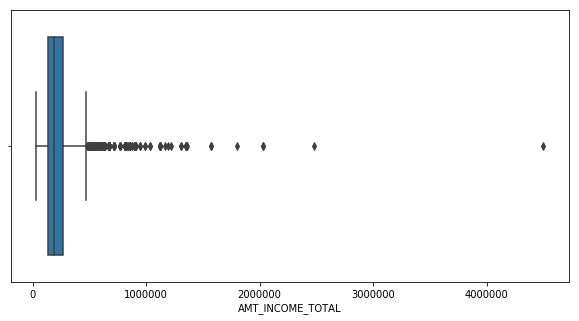

In [8]:
# box plot
print(app_train['AMT_INCOME_TOTAL'].describe())

eda.IQRScore(app_train, ['AMT_INCOME_TOTAL'],plot = True, figsize = (10,5))


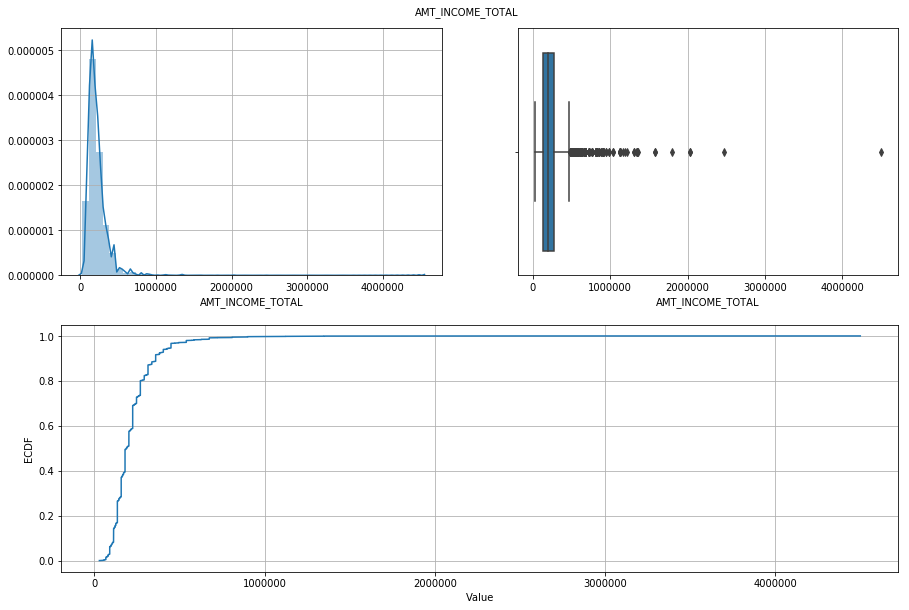

In [9]:
# plot

eda.PlotNumerical(app_train,['AMT_INCOME_TOTAL'], figsize = (15,10),ticksfontsize = 10,titlefontsize = 10)

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

count    11351.000000
mean         0.024095
std          0.016970
min          0.000290
25%          0.010643
50%          0.020246
75%          0.030755
max          0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


,IQR_Score,Outliers_Counts,Q1,Q1 - 1.5IQR,Q3,Q3 + 1.5IQR
REGION_POPULATION_RELATIVE,0.020112,810,0.010643,-0.019525,0.030755,0.060923


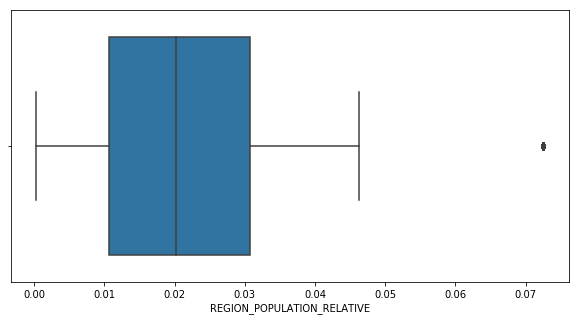

In [10]:
print(app_train['REGION_POPULATION_RELATIVE'].describe())

eda.IQRScore(app_train, ['REGION_POPULATION_RELATIVE'],plot = True, figsize = (10,5))

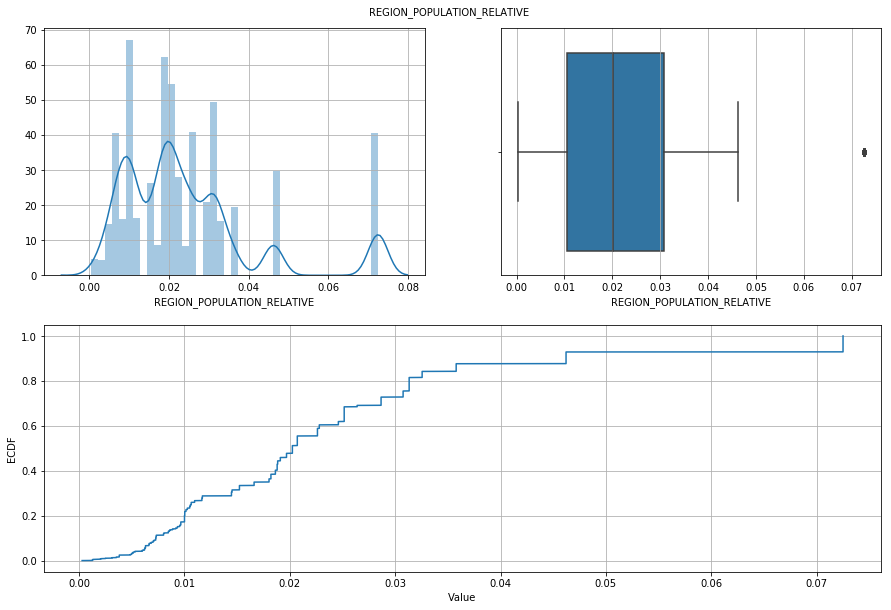

In [11]:
# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
eda.PlotNumerical(app_train,['REGION_POPULATION_RELATIVE'], figsize = (15,10),ticksfontsize = 10,titlefontsize = 10)


count    11351.000000
mean         1.326932
std          2.193618
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         27.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


,IQR_Score,Outliers_Counts,Q1,Q1 - 1.5IQR,Q3,Q3 + 1.5IQR
OBS_60_CNT_SOCIAL_CIRCLE,2.0,653,0.0,-3.0,2.0,5.0


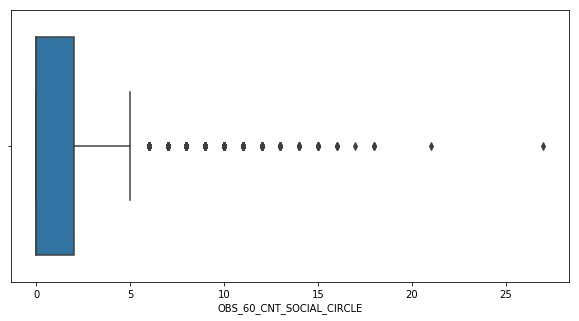

In [12]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

eda.IQRScore(app_train, ['OBS_60_CNT_SOCIAL_CIRCLE'],plot = True, figsize = (10,5))

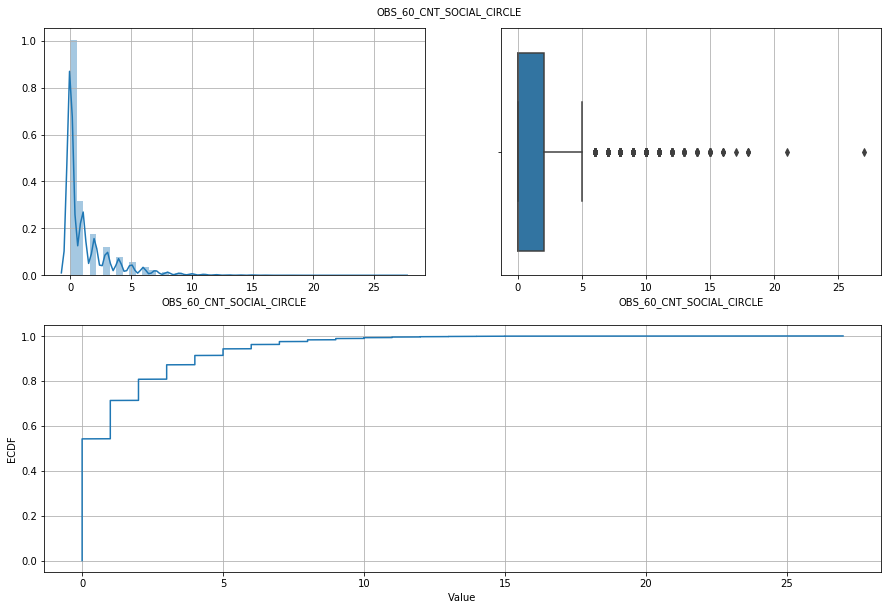

In [13]:
# plot
"""
Your Code Here

"""

eda.PlotNumerical(app_train,['OBS_60_CNT_SOCIAL_CIRCLE'], figsize = (15,10),ticksfontsize = 10,titlefontsize = 10)


In [14]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

27.0       1
21.0       1
18.0       3
17.0       1
16.0       4
15.0       9
14.0       8
13.0      12
12.0      18
11.0      30
10.0      44
9.0       67
8.0       88
7.0      148
6.0      219
5.0      335
4.0      471
3.0      730
2.0     1072
1.0     1940
0.0     6150
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

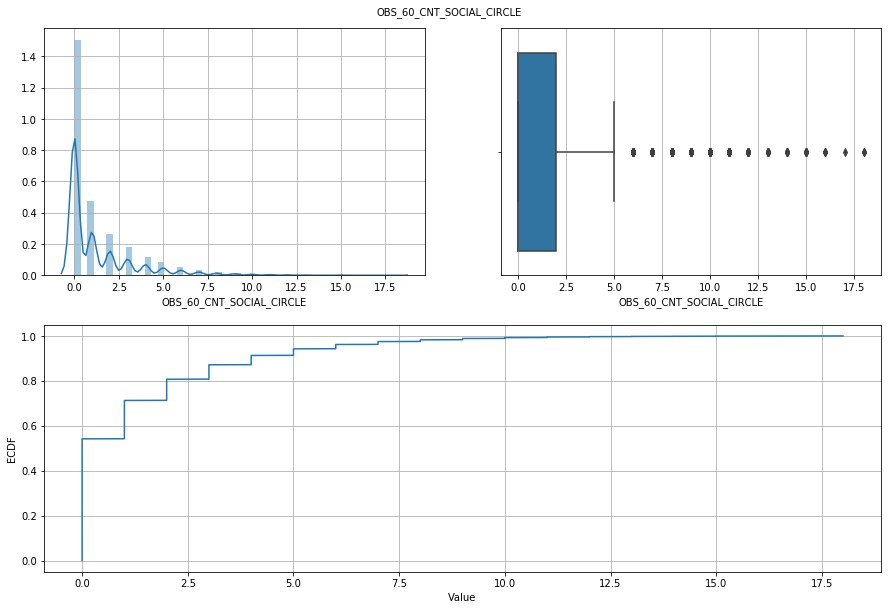

In [15]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
eda.PlotNumerical(app_train.loc[app_train['OBS_60_CNT_SOCIAL_CIRCLE'] < 20],['OBS_60_CNT_SOCIAL_CIRCLE'], figsize = (15,10),ticksfontsize = 10,titlefontsize = 10)
